# **Project: End-to-End Machine Learning Model Deployment Using Flask & HTML**

## **Use Case:** Predicting Student Marks Based on Study Hours  


# Business Problem

 **Client: A University**

- **Concern:** Students scoring below expectations
  - No student scores above 90%
  - Average below 60%


- **Goal:** Understand if study hours affect marks and build a prediction tool.

- **Collaboration:** Client signs a 3-month contract with a Data Analytics company.


## Real-World Data Access & Privacy

- Clients rarely give access to real production servers due to security policies.
- Only ~5% employees can access live production.
- Remaining 95% work with **duplicate/test datasets**.
- In our case: We received only `hours_of_studied` and `marks`.


##  Dataset Overview

| Column Name       | Description                         |
|-------------------|-------------------------------------|
| hours_of_studied  | Number of hours a student studied   |
| marks             | Marks scored by the student (0–100) |

- A **simple regression problem**.
- Target variable: `marks`
- Input feature: `hours_of_studied`


# Project Workflow: Real-Time ML Deployment Pipeline

**Step 1: Business Understanding**

- Understand client problem
- Define goals and KPIs

**Step 2: Data Collection**

- Extract sample/duplicate data shared by client

**Step 3: Data Preprocessing**
    
- Check for nulls
- Visualize patterns using scatter plots

**Step 4: Model Building**
    
- Use `LinearRegression` from `sklearn`
- Train model on data

**Step 5: Model Saving**
    
- Save model using `joblib`
- File name: `model.pkl`

**Step 6: Testing the Model**

- Input: hours studied
- Output: predicted marks
- Metrics: R², MAE, etc.

**Step 7: Deployment Structure**
``` bash
tudent_marks_predictor/
├── app.py
├── model.pkl
├── templates/
│ └── index.html
└── static/
└── style.css (optional)
```

**Step 8: Frontend (index.html)**

- HTML form to input study hours
- Displays predicted marks on the same page

**Step 9: Backend (Flask)**

- Load model
- Accept form data
- Return prediction


# Real-Time Output

| Input (Hours) | Predicted Marks |
|---------------|------------------|
| 1             | 15               |
| 5             | 75               |
| 9             | 92               |

> Model predicts marks in real-time via web form.


# Key Learnings

- Real-world ML projects use **duplicate or masked data**
- Model should be saved using `joblib`
- Full pipeline must be built:
  - Preprocessing
  - Training
  - Saving
  - Deployment
- File structure and documentation are crucial

# Technologies Used

| Component        | Tool/Library         |
|------------------|----------------------|
| Language         | Python               |
| ML Model         | scikit-learn (LinearRegression) |
| Deployment       | Flask                |
| Frontend         | HTML, CSS (optional) |
| Model Saving     | joblib               |
| Data Viz         | matplotlib/seaborn   |


# Student Marks Prediction using Linear Regression code :

In [2]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#  Step 2: Load the Dataset
# Dataset Link: Public Google Drive CSV
path = r"C:\Users\Lenovo\OneDrive\Desktop\student_info.csv"
df = pd.read_csv(path)


In [4]:
# Display top and bottom rows
df.head()


,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
# Check dataset shape
df.shape

(200, 2)

In [7]:
# Step 3: Discover and Visualize the Data
# Basic info about dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
# Statistical summary
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


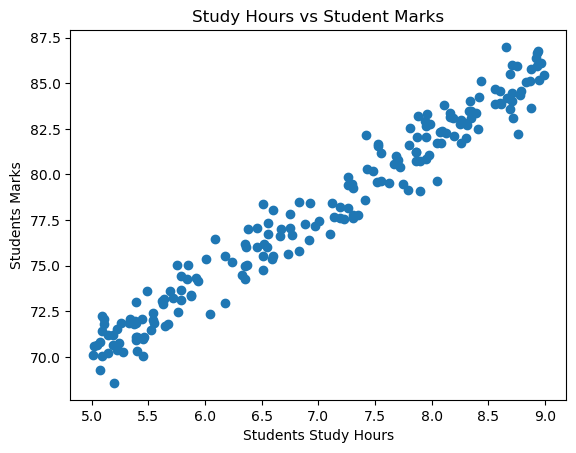

In [9]:
# Scatter Plot to visualize relationship
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks")
plt.title("Study Hours vs Student Marks")
plt.show()

In [10]:
# Step 4: Prepare Data for Machine Learning
# Check for missing values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
# Check the mean for imputation
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
# Fill missing values with mean
df2 = df.fillna(df.mean())

In [13]:
# Confirm no missing values remain
df2.isnull().sum()
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [14]:
#  Step 5: Split Dataset into Features and Labels
X = df2.drop("student_marks", axis="columns")  # Independent variable (study_hours)
y = df2.drop("study_hours", axis="columns")    # Dependent variable (marks)

print("Shape of X =", X.shape)
print("Shape of y =", y.shape)

Shape of X = (200, 1)
Shape of y = (200, 1)


In [15]:
#  Step 6: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=51
)

print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (160, 1)
y_train Shape: (160, 1)
X_test Shape: (40, 1)
y_test Shape: (40, 1)


In [16]:
#  Step 7: Model Selection and Training
# Linear Regression Model: y = m * x + c
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Model coefficients
print(lr.coef_)
print(lr.intercept_)

[[3.93571802]]
[50.44735504]


In [20]:
#  Step 8: Manual Prediction Check (Optional)
m = 3.93
c = 50.44
y = m * 4 + c
y


66.16

In [21]:
#  Step 9: Predicting Student Marks
# Predict for a new value
lr.predict([[4]])[0][0].round(2)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.19)

In [22]:
#  Step 10: Predict for Test Set
y_pred = lr.predict(X_test)

# Combine inputs, original marks, and predictions into a DataFrame
pd.DataFrame(
    np.c_[X_test, y_test, y_pred],
    columns=["Study Hours", "Original Marks", "Predicted Marks"]
)


,Study Hours,Original Marks,Predicted Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [23]:
#  Step 11: Model Evaluation and Fine-Tuning
# R² score (Accuracy of predictions)
lr.score(X_test, y_test)


0.9514124242154464

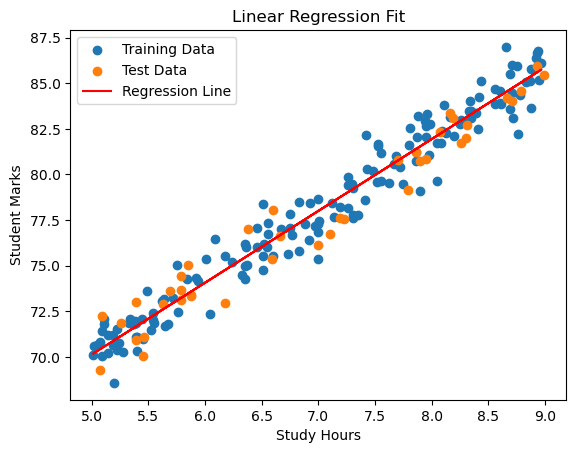

In [24]:
#  Step 12: Visualizing the Regression Line
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_train, lr.predict(X_train), color="r", label="Regression Line")
plt.legend()
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Linear Regression Fit")
plt.show()


In [25]:
#  Step 13: Save the Model using joblib

# What is joblib?
# joblib is a Python library used to serialize (save) Python objects efficiently.
# It is optimized for storing large numpy arrays or models.
# Better than pickle for large data.

import joblib

# Save the trained model
joblib.dump(lr, "student_mark_predictor_model_pickel_file.pkl")


['student_mark_predictor_model_pickel_file.pkl']

In [27]:
#  Step 14: Load and Use the Saved Model
model = joblib.load("student_mark_predictor_model_pickel_file.pkl")

# Predict using the loaded model
model.predict([[5]])[0][0]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.12594512018406)

# Launch, Monitor, and Maintain

Now that the model is trained and saved, the next step is **real-world deployment**.

This is where the project moves from a Jupyter Notebook to a **usable web application**, so anyone can input values (like study hours) and instantly get predictions (like expected marks).



##  Deployment Stack:
| Component      | Tool Used    | Purpose                                      |
|----------------|--------------|----------------------------------------------|
| Frontend       | HTML         | User input form (study hours)                |
| Backend        | Flask (Python)| Receives input, loads model, returns result |
| Model Storage  | Joblib       | Load pre-trained `.pkl` model                |
| Web Server     | Flask Server | Runs the app locally or on a cloud platform  |



##  How It Works (Real-Time Prediction Pipeline):

1. **User Interface (HTML):**  
   A simple form where users input how many hours they study.

2. **Backend Processing (Flask):**  
   - Receives the input
   - Loads the `student_mark_predictor.pkl` model
   - Makes prediction using the trained model
   - Returns the result to the frontend

3. **Result Display:**  
   The predicted marks are shown on the same page.



##  Example Use Case:
- Student inputs: `5 hours`
- Flask loads model → `model.predict([[5]])`
- Output: **Predicted Marks: 74.8**


##  Why It Matters:
- This shows how data science models can be **used by non-programmers** via a clean interface.
- Demonstrates **end-to-end ML lifecycle**:
  - Data → Model → Save → Deploy → Use



##  Bonus Insight:
In real companies:
- Frontend is often built with **React**, **Angular**, or **Streamlit**.
- Backend APIs may use **Flask**, **FastAPI**, or **Django**.
- Model serving is done via **Docker**, **Kubernetes**, or **cloud platforms** like AWS/GCP/Azure.

 Your model is now **deployment-ready**, and this step bridges the gap between **ML and business value**.


# Create the HTML Form (Frontend)
``` bash 
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Student Marks Predictor</title>
    <script src="https://cdn.jsdelivr.net/npm/particles.js@2.0.0/particles.min.js"></script>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }

        html, body {
            height: 100%;
            font-family: 'Poppins', sans-serif;
        }

        #particles-js {
            position: absolute;
            width: 100%;
            height: 100%;
            background: linear-gradient(to right, #2c5364, #203a43, #0f2027);
            z-index: -1;
        }

        .container {
            height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
        }

        .card {
            background: rgba(255, 255, 255, 0.1);
            padding: 30px 40px;
            border-radius: 20px;
            backdrop-filter: blur(10px);
            color: white;
            text-align: center;
            box-shadow: 0 0 20px rgba(0,0,0,0.4);
        }

        input[type="number"] {
            padding: 10px;
            border-radius: 10px;
            border: none;
            width: 200px;
            font-size: 16px;
            margin-bottom: 20px;
        }

        input[type="submit"] {
            padding: 10px 25px;
            border: none;
            border-radius: 10px;
            background-color: #00c6ff;
            color: white;
            font-size: 16px;
            cursor: pointer;
            transition: 0.3s ease;
        }

        input[type="submit"]:hover {
            background-color: #0072ff;
        }

        .result {
            margin-top: 20px;
            font-size: 20px;
        }

        .error {
            margin-top: 20px;
            font-size: 18px;
            color: #ff4d4d;
        }
    </style>
</head>
<body>
    <div id="particles-js"></div>

    <div class="container">
        <div class="card">
            <h1>📘 Student Marks Predictor</h1>
            <form method="POST" action="/predict">
                <input type="number" name="hours" step="0.1" min="0" max="24"
                       placeholder="Enter study hours (0–24)"
                       required onfocus="clearResult()"><br>
                <input type="submit" value="Predict Marks">
            </form>

            {% if prediction %}
            <div class="result" id="outputBox">
                🔢 For <strong>{{ hours }}</strong> hours studied,<br>
                  Predicted Marks: <strong>{{ prediction }}%</strong>
            </div>
            {% elif error %}
            <div class="error" id="outputBox">
                {{ error }}
            </div>
            {% endif %}
        </div>
    </div>

    <!-- particles.js config -->
    <script>
        particlesJS("particles-js", {
            "particles": {
                "number": { "value": 80 },
                "color": { "value": "#ffffff" },
                "shape": {
                    "type": "circle",
                    "stroke": { "width": 0, "color": "#000000" },
                },
                "opacity": { "value": 0.5 },
                "size": { "value": 3 },
                "line_linked": {
                    "enable": true,
                    "distance": 150,
                    "color": "#ffffff",
                    "opacity": 0.4,
                    "width": 1
                },
                "move": {
                    "enable": true,
                    "speed": 6,
                    "direction": "none",
                    "random": false,
                    "straight": false,
                    "out_mode": "out",
                    "bounce": false,
                }
            },
            "interactivity": {
                "detect_on": "canvas",
                "events": {
                    "onhover": { "enable": true, "mode": "grab" },
                    "onclick": { "enable": true, "mode": "push" },
                    "resize": true
                },
                "modes": {
                    "grab": { "distance": 140, "line_linked": { "opacity": 1 } },
                    "bubble": { "distance": 400, "size": 40, "duration": 2, "opacity": 8 },
                    "repulse": { "distance": 200 },
                    "push": { "particles_nb": 4 },
                    "remove": { "particles_nb": 2 }
                }
            },
            "retina_detect": true
        });

        // 🧠 JavaScript to clear result on input focus
        function clearResult() {
            let output = document.getElementById("outputBox");
            if (output) {
                output.innerHTML = "";
            }
        }
    </script>
</body>
</html>

```

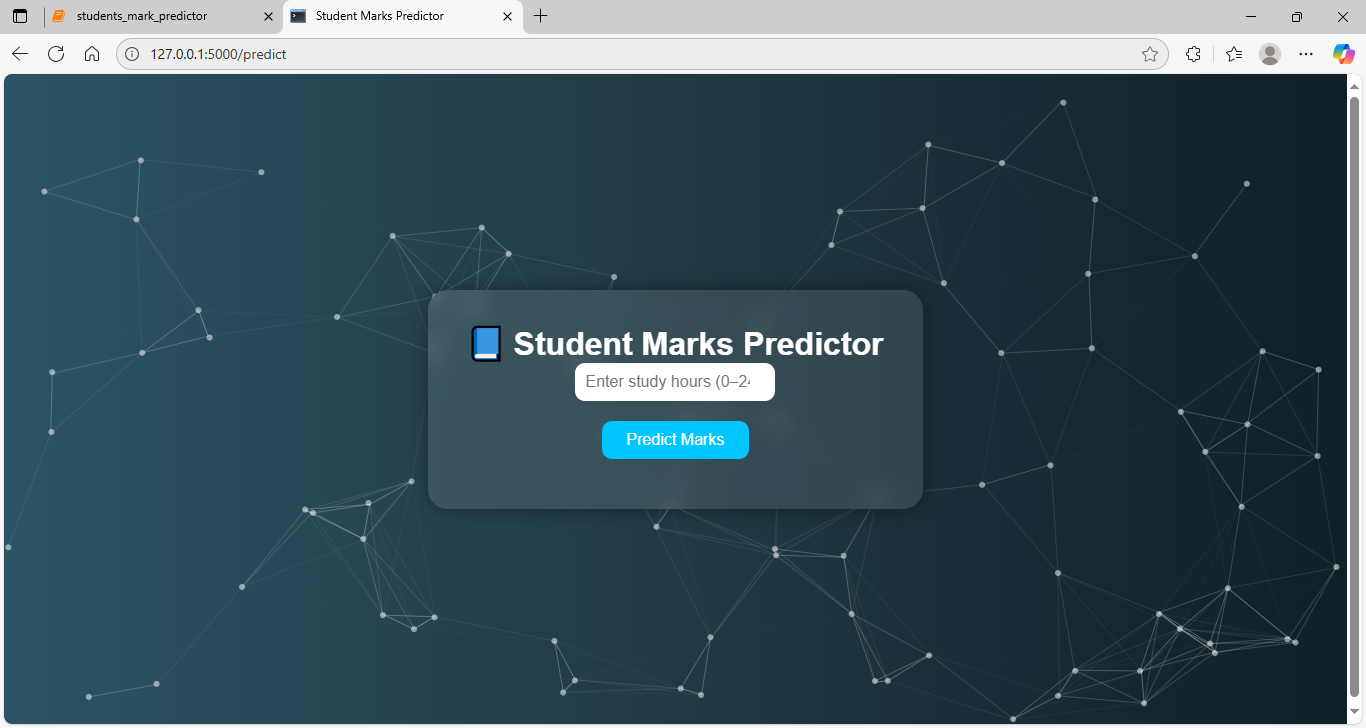

In [35]:
# Frontend Screenshot – Prediction Example
#![Student Marks Predictor Frontend view](Overall_app_look.PNG)
from IPython.display import Image, display
display(Image(filename="Overall_app_look.png"))

# Create Flask Backend

``` python

   from flask import Flask, render_template, request
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load("student_mark_predictor_model_pickel_file.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        try:
            hours = float(request.form['hours'])

            # ⛔ Input validation
            if hours < 0 or hours > 24:
                return render_template('index.html', error="❌ Study hours must be between 0 and 24.")

            # ✅ Make prediction
            prediction = model.predict([[hours]])[0][0].round(2)

            # 🛑 Clamp predicted marks between 0 and 100
            prediction = max(0.0, min(100.0, prediction))

            return render_template('index.html', prediction=prediction, hours=hours)

        except Exception as e:
            return render_template('index.html', error=f"❌ Invalid input: {str(e)}")

if __name__ == "__main__":
    app.run(debug=True)

    
```

## Run Your Flask App

Open your terminal, navigate to your project folder, and run:

``` python 
python app.py

```

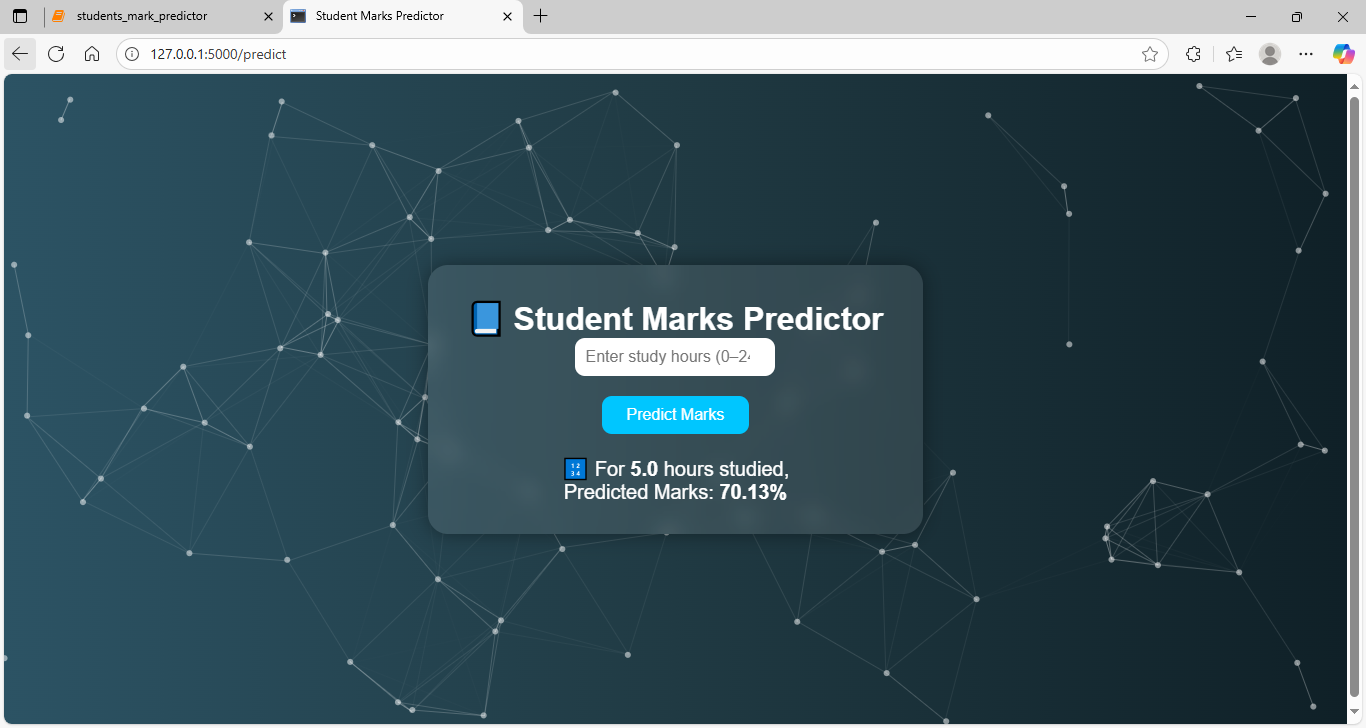

In [37]:
from IPython.display import Image, display
display(Image(filename="Result_for_5_hours.png"))


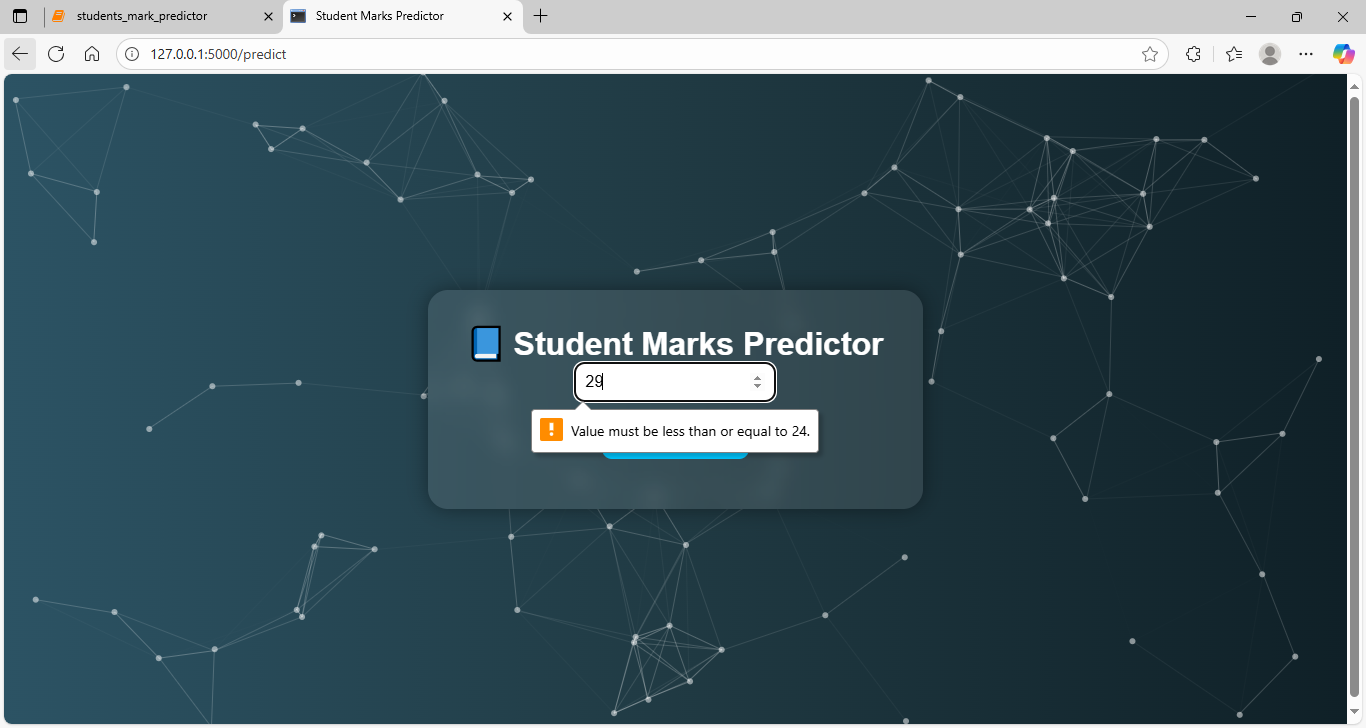

In [38]:
from IPython.display import Image, display
display(Image(filename="Result_for_more_than_24_hours.png"))


# Real-World Deployment: Application Server vs Production Server



##  What Is Deployment?

**Deployment** means transferring your working application or ML model from the **development (application) server** to the **production server**, where **real users** interact with the system.

> **Deployment = Moving code from App Server → Production Server**



##  Application Server (Dev/Test Server)

- Used by developers or data scientists
- Connected to **temporary/test data**
- Debugging and logging enabled
- You can freely install packages, write logs, and test
- No access to real production credentials or live database



##  Production Server

- Used by **real users** (e.g., students, clients, customers)
- Connected to **production (live) database**
- Secure, restricted, and closely monitored
- Often running on older infrastructure or limited environments
- Data privacy and compliance rules are enforced strictly



##  Important Question: What Challenges Do You Face in Deployment?

###  Full Answer:

> "Deployment from the app server to production often fails or causes issues due to multiple real-world challenges. In production, environments are stricter, older, and secure — unlike the flexible app server. Here are some common challenges I’ve faced:"



**1. Different Environment Configurations**

- App server uses updated libraries and packages
- Production might use older versions (Python 3.6, etc.)
- Your code may crash if version mismatch occurs
- Must match `requirements.txt` and test compatibility

**2. Firewall & Security Blocks**

- Production server blocks:
  - External APIs or download links
  - Untrusted file types (`.pkl`, `.json`)
  - Personal info like SSN, Email
- Result: code fails silently or gets auto-blocked

**3. Hardcoded Paths & File Access**

- Local path: `C:\Users\Akshay\Documents\project\model.pkl`
- These fail in Linux-based production
- Always use **relative paths** and `os.path.join()`

**4. Works on App Server but Not on Prod**

- Reasons:
  - Debug mode is OFF
  - Logging is minimal
  - Prod server restricts writing files or printing
  - No developer tools installed

**5. Data Quality and Size**

- You trained on clean, small, temporary data
- Production has large, real-world messy data
- May cause:
  - Model to fail
  - Inaccurate predictions
  - Memory issues

**6. Timeouts and Execution Limits**

- In production, scripts must run fast
- Long-running operations are **auto-killed**
- Each prediction/API call must return within seconds

**7. Environment Restrictions**

- Cannot:
  - Install random packages
  - Use pip freely
  - Write files to root
- Need permission from IT/Admin or DevOps

**Pro Tip**

> "A successful deployment depends on how well you package your code, handle configuration differences, and test in a **staging server** before going live."

**Final Thought**

**Just because it works on your machine does NOT mean it will work on production.**

This is why:
- DevOps, MLOps, and Staging Environments are **critical** for real-world projects
- Testing on production-like systems before going live is a best practice


# Conclusion

This project is a real-world simulation of deploying a **machine learning model** to predict student marks based on study hours. It teaches how to:

- Understand business problems
- Work with limited, masked data
- Build simple regression models
- Save and deploy models using Flask
- Deliver full-stack ML applications

A perfect first project for understanding **real-time ML in action**.
